In [3]:
import pandas as pd
import numpy as np

In [4]:
data_test = pd.read_csv('Test.csv')
data_train = pd.read_csv('Train.csv')
print(data_train[data_train['Market_Category'] ==250].head(35))
print(data_test.corr(method ='pearson'))

       Item_Id        Date  State_of_Country  Market_Category  \
201     IT_438  2007-07-11                 0              250   
215     IT_484  2007-07-12                 0              250   
266     IT_642  2007-07-14                 0              250   
317     IT_812  2007-07-16                 0              250   
372    IT_1006  2007-07-19                 0              250   
564    IT_1860  2007-07-30                 0              250   
571    IT_1896  2007-07-31                 0              250   
598    IT_2013  2007-08-02                 0              250   
607    IT_2074  2007-08-03                 0              250   
991    IT_3936  2007-08-31                 0              250   
1176   IT_4940  2007-09-15                 0              250   
2312  IT_10662  2008-01-22                 0              250   
3567  IT_19093  2008-04-07                 0              250   
3939  IT_22543  2008-05-05                 0              250   
7037  IT_54512  2009-04-2

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import datetime

# Remove outliers of dataset(Impute values)
outlier_demmand = np.where(data_train['Demand'] >= 15000,np.nan,data_train['Demand'])
outlier_high_cap_price = np.where(data_train['High_Cap_Price'] >= 40000,np.nan,data_train['High_Cap_Price'])
outlier_low_cap_price = np.where(data_train['Low_Cap_Price'] <= 50,150,data_train['Low_Cap_Price'])
imputer_outliers = SimpleImputer(missing_values=np.nan, strategy='median')
data_train['Demand'] = imputer_outliers.fit_transform(outlier_demmand.reshape(-1, 1))
data_train['High_Cap_Price'] = imputer_outliers.fit_transform(outlier_high_cap_price.reshape(-1, 1))

y = data_train['Low_Cap_Price']
features = ['State_of_Country','Demand','High_Cap_Price']
x = data_train[features]
print(data_train.describe())

month = []
year = []
day = []
for date in data_train['Date']:
    date_time = datetime.datetime.strptime(date,"%Y-%m-%d")
    month.append(date_time.month)
    year.append(date_time.year)
    day.append(date_time.day)
#"""
date_days = []
for date in data_train['Date']:
    date_days.append((datetime.datetime.strptime(date,"%Y-%m-%d") - datetime.datetime(1970,1,1)).days + 1)
#"""
    
date = {'month':month, 'day':day, 'days_since_1970':date_days}
#date = {'year':year, 'month':month, 'day':day}
#date = {'days_since_1970':date_days, 'importance_product':importance_product}
df_date = pd.DataFrame(date)

x_final = pd.concat([x, df_date], axis=1)
# days_since_1970 * High_Cap_Price
"""
importance_product = []
for i in range(len(x_final['Market_Category'])):
    #importance_product.append(max(data_train['Demand'][i] * data_train['Market_Category'][i],data_train['Market_Category'][i]))
    importance_product.append(max(x_final['High_Cap_Price'][i]*x_final['Market_Category'][i],x_final['High_Cap_Price'][i]))

correlations = {'days_high_price':importance_product}
df_correlations = pd.DataFrame(correlations)
x_final_new = pd.concat([x_final, df_correlations], axis=1)
"""

print(x_final.corr())
x_train, x_test, y_train, y_test = train_test_split(x_final,y, test_size=0.15,random_state=1)

       State_of_Country  Market_Category  Product_Category        Grade  \
count       9798.000000      9798.000000       9798.000000  9798.000000   
mean          14.278730       198.414064          2.492958     0.652072   
std            8.760964       169.767862          4.751807     1.032439   
min            0.000000         0.000000          0.000000     0.000000   
25%            3.000000        55.000000          0.000000     0.000000   
50%           20.000000       129.000000          0.000000     0.000000   
75%           21.000000       389.000000          1.000000     2.000000   
max           23.000000       471.000000         17.000000     3.000000   

            Demand  Low_Cap_Price  High_Cap_Price  
count  9798.000000    9798.000000     9798.000000  
mean     51.760033    3500.273525     6344.402225  
std     355.976788    2188.046803     3614.126921  
min       0.000000       1.000000      163.000000  
25%       0.500000    1863.250000     3878.250000  
50%       2.

In [294]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
#model = ExtraTreesRegressor(n_estimators=225, random_state=1)
#model = RandomForestRegressor(n_estimators = 100, max_depth=50, random_state = 1)
model = RandomForestRegressor(n_estimators = 260, min_samples_split=2, min_samples_leaf=2,
                             max_depth=60, random_state = 1)
#model = RandomForestRegressor(n_estimators = 230, min_samples_split=5, min_samples_leaf=1,max_features='auto',
                             #max_depth=None, bootstrap=True, random_state = 1)
model.fit(x_train,y_train)
"""
distributions = {'max_depth': [30, 40, 50, 60, 70, 80],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [220, 240, 250, 260, 280]}
clf = RandomizedSearchCV(model, distributions, random_state=0)
search = clf.fit(x_final, y)
print(search.best_params_)
"""
y_pred = model.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Log Error:', max(0, 100 - metrics.mean_squared_log_error(y_test, y_pred)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 525.6004406448399
Mean Squared Log Error: 99.89179767651416
Root Mean Squared Error: 918.2256154139117


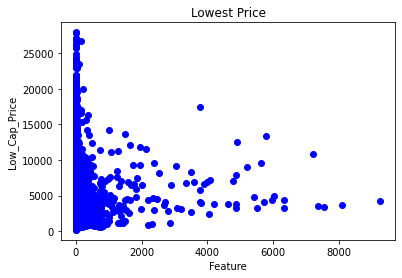

In [295]:
import matplotlib.pyplot as plt

plt.title('Lowest Price')
plt.xlabel('Feature')
plt.ylabel('Low_Cap_Price')
plt.scatter(x_final['Demand'],x_final['High_Cap_Price'], color='blue')

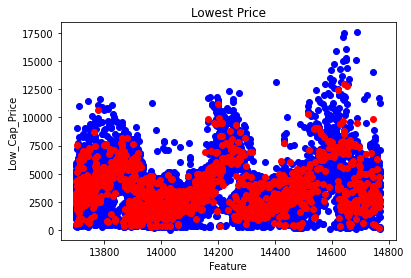

In [296]:
plt.title('Lowest Price')
plt.xlabel('Feature')
plt.ylabel('Low_Cap_Price')
plt.scatter(x_final['days_since_1970'],y, color='blue')
plt.scatter(x_test['days_since_1970'],y_pred, color='red')

In [297]:

month = []
year = []
day = []
for date in data_test['Date']:
    date_time = datetime.datetime.strptime(date,"%Y-%m-%d")
    month.append(date_time.month)
    year.append(date_time.year)
    day.append(date_time.day)

#"""
date_days = []
for date in data_test['Date']:
    date_days.append((datetime.datetime.strptime(date,"%Y-%m-%d") - datetime.datetime(1970,1,1)).days + 1)
#"""

date = {'month':month, 'day':day, 'days_since_1970':date_days}
#date = {'year':year, 'month':month, 'day':day}
#date = {'days_since_1970':date_days, 'importance_product':importance_product}
df_date = pd.DataFrame(date)

x_test_final = pd.concat([data_test[features], df_date], axis=1)
# days_since_1970 * High_Cap_Price
"""
importance_product = []
for i in range(len(x_test_final['High_Cap_Price'])):
    #importance_product.append(max(data_train['Demand'][i] * data_train['Market_Category'][i],data_train['Market_Category'][i]))
    importance_product.append(max(x_test_final['High_Cap_Price'][i]*x_test_final['Market_Category'][i],x_test_final['High_Cap_Price'][i]))

correlations = {'days_high_price':importance_product}
df_correlations = pd.DataFrame(correlations)
x_final_new = pd.concat([x_test_final, df_correlations], axis=1)
"""
test_preds = model.predict(x_test_final)

result = pd.read_csv('sample_submission.csv')

print('Mean Absolute Error:', metrics.mean_absolute_error(result['Low_Cap_Price'], test_preds))
print('Mean Squared Log Error:', max(0, 100 - metrics.mean_squared_log_error(result['Low_Cap_Price'], test_preds)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(result['Low_Cap_Price'], test_preds)))


output = pd.DataFrame({'Item_Id':data_test['Item_Id'],
                      'Low_Cap_Price':test_preds})
print(output.head(10))

Mean Absolute Error: 3761.9315330135023
Mean Squared Log Error: 99.12551372542556
Root Mean Squared Error: 4582.484730245889
     Item_Id  Low_Cap_Price
0  IT_265079    2875.062578
1  IT_265087    3297.781223
2  IT_265107    6800.657759
3  IT_265139    7852.045479
4  IT_265142    2297.543816
5  IT_265144    1473.336954
6  IT_265148    2605.816392
7  IT_265156    5528.592129
8  IT_265162    5607.538150
9  IT_265170    4667.377998


In [298]:
output.to_csv('RFR_submission.csv', index=False)